In [ ]:
# Подключ. библиотек
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

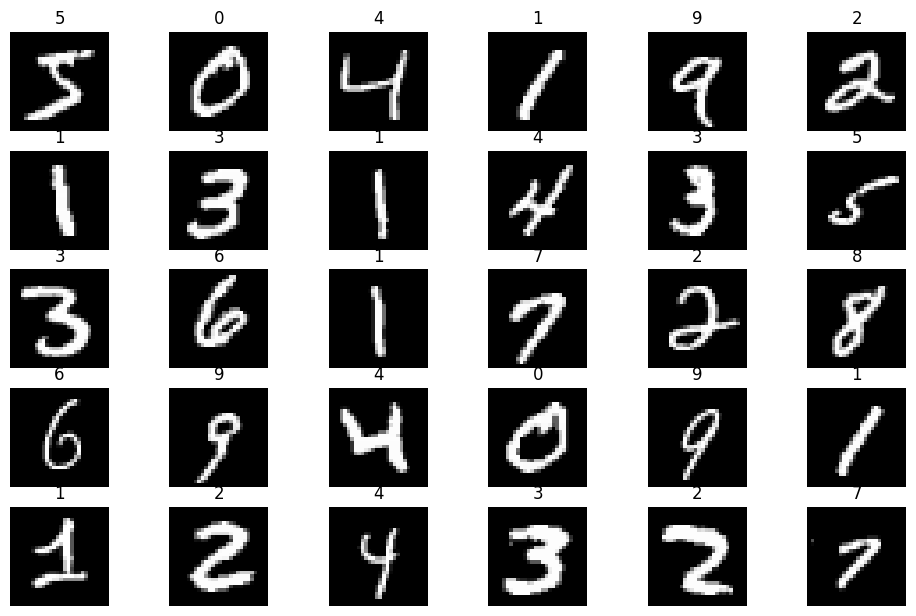

In [ ]:
# Загрузка данных a и b (обуч) - c и d (тестов.) и деление пикселей на 255 для нормализации
(a, b), (c, d) = tf.keras.datasets.mnist.load_data()

a, c = a / 255.0, c / 255.0

# Обучающий набор из mnist
plt.figure(figsize=(12,9))
for i in range(30):
    plt.subplot(6,6,i+1)
    plt.imshow(a[i], cmap='gray')
    plt.title(str(b[i]))
    plt.axis('off')
plt.show()

In [ ]:
# Обучение модели
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(8)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(a, b, epochs=12, validation_data=(c, d))

# Оценка точности модели
test_loss, test_acc = model.evaluate(c, d, verbose=2)
print('\nТочность тестовом наборе:', test_acc)

Epoch 1/12
1875/1875 [==============================] - 9s 4ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/12
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/12
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/12
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/12
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/12
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/12
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/12
1875/1875 [============

# Новый раздел

313/313 [==============================] - 0s 2ms/step


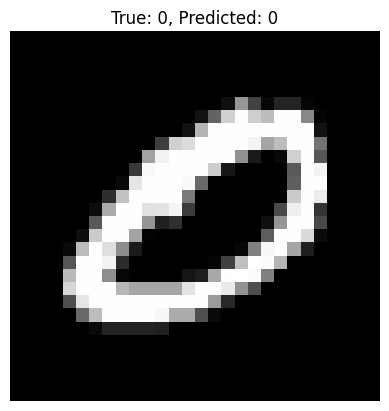

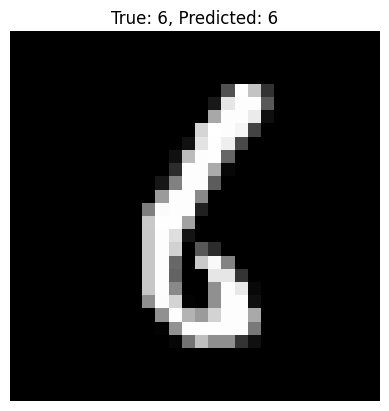

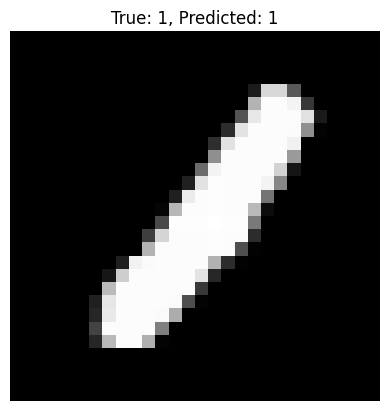

In [ ]:
# Вывод случайных изображений для проверки работы модели
predictions = model.predict(c)
random_indices = np.random.choice(len(c), size=3, replace=False)
for idx in random_indices:
    plt.imshow(c[idx], cmap='gray')
    plt.title(f"Вывелось: {d[idx]}, Предсказано: {np.argmax(predictions[idx])}")
    plt.axis('off')
    plt.show()



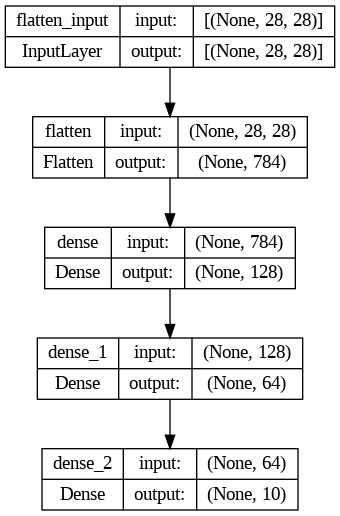

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)